# **Modelling and Evaluating**

## Objectives

- Answer business requirement 2:
    - The client is interested to tell wheterh a given leaf is covered with powdery mildew

## Inputs

- Image shape are located in a pickle file.
- Images from the test, train, validation folders and their subfolders.

## Outputs

- Image and label distribution plot:
    - Bar chart showing the number of images per label in the train, validation, and test sets.
    - Pie chart showing the percentage of images in each set.
- Image augmentation:
    -Plot showing a sample of augmented images for each set.
- Class indices:
    -A dictionary of class indices is to be used for prediction inference on the labels.
- Model creation and summary:
    - Creation of a machine learning model and display of its outline.
- Model training:
    - Train the model using the train set and validate on the validation set.
- Save model:
    - Save the trained model.
- Learning curve plot:
    - The plot of model performance on the train and validation set.
- Model evaluation:
    - Evaluate the model performance on the test set.
    - Calculate accuracy and plot the ROC curve.
    - Classification report:
        - For Model A: overall accuracy and per-class precision, recall, and F1 score.
        - For Model B: classification report with macro avg and weighted avg.
        - For Model C: synthetic classification report per label.
    - Plot confusion matrix.
    - Save evaluation results as a pickle file.
- Prediction on a random image file:
    - Predict the label of a random image file using the trained model.


---

### Import packages

In [105]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import tensorflow as tf
from matplotlib.image import imread

---

### Set working directory

In [106]:
cwd = os.getcwd()

In [107]:
os.chdir('/workspace/mildew-detector')
print("You set a new current directory")

You set a new current directory


In [108]:
work_dir = os.getcwd()
work_dir

'/workspace/mildew-detector'

---

## Set input directories

Set train, validation and test paths

In [109]:
my_data_dir = 'inputs/cherryleaves_dataset/cherry-leaves'
train_path = my_data_dir + '/train' 
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'

## Set output directory

In [103]:
version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(work_dir) and version in os.listdir(work_dir + '/outputs'):
    print('Old version is already available create a new version.')
    pass
else:
    os.makedirs(name=file_path)

Old version is already available create a new version.


## Set Label names

In [11]:
labels = os.listdir(train_path)
print('Label for the images are', labels)

Label for the images are ['healthy', 'powdery_mildew']


### Set image shape

In [12]:
import joblib
version = 'v1'
image_shape = joblib.load(filename=f"outputs/{version}/image_shape.pkl")
image_shape

(256, 256, 3)

---

### Images distribution

Count number of images per set and label

In [13]:
import os
import kaleido
import plotly.express as px
import plotly.io as pio

# Set the data directory
my_data_dir = 'inputs/cherryleaves_dataset/cherry-leaves'

# Define the train, validation, and test paths
train_path = os.path.join(my_data_dir, 'train') 
val_path = os.path.join(my_data_dir, 'validation')
test_path = os.path.join(my_data_dir, 'test')

# Get the list of labels
labels = os.listdir(train_path)

# Create a DataFrame to store the image distribution and count per set and label
df_freq = pd.DataFrame([])

# Iterate over the sets and labels and count the number of images
for folder in ['train', 'test', 'validation']:
    for label in labels:
        try:
            count = len(os.listdir(os.path.join(my_data_dir, folder, label)))
        except:
            count = None
        df_freq = df_freq.append(pd.Series({
            'Set': folder,
            'Label': label,
            'Count': count
        }), ignore_index=True)

# Print the image distribution and count per set and label
for folder in ['train', 'test', 'validation']:
    print(f"{folder.capitalize()} set:")
    print(df_freq[df_freq['Set']==folder].to_string(index=False))
    print("\n")


# Plot the image distribution and count per set and label using Plotly
fig = px.sunburst(df_freq, path=['Set', 'Label'], values='Count')
fig.show()

# Save the image to the file path as a PNG with a width of 800 pixels and height of 600 pixels
pio.write_image(fig, "outputs/v1/img_distribution.png", width=800, height=600, format='png')


Train set:
  Count           Label    Set
 1472.0         healthy  train
 1472.0  powdery_mildew  train


Test set:
 Count           Label   Set
 422.0         healthy  test
 422.0  powdery_mildew  test


Validation set:
 Count           Label         Set
 210.0         healthy  validation
 210.0  powdery_mildew  validation




---

## Image data augmentation

Import necessary libraries.

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

- Define the image data generator with augmentation techniques.

In [111]:
augmented_image_data = ImageDataGenerator(rotation_range=20,
                                          width_shift_range=0.10,
                                          height_shift_range=0.10,
                                          shear_range=0.1,
                                          zoom_range=0.1,
                                          horizontal_flip=True,
                                          vertical_flip=True,
                                          fill_mode='nearest',
                                          rescale=1./255
                                          )

- Set batch size.

In [16]:
batch_size = 32
data_color_mode = 'rgb'
data_class_mode = 'binary'

#### Plot augmented training image set.

In [113]:
batch_size = batch_size  # Set batch size
train_set = augmented_image_data.flow_from_directory(train_path,
                                                     target_size=image_shape[:2],
                                                     color_mode=data_color_mode,
                                                     batch_size=batch_size,
                                                     class_mode=data_class_mode,
                                                     shuffle=True
                                                     )

train_set.class_indices

Found 2944 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

In [114]:
validation_set = ImageDataGenerator(rescale=1./255).flow_from_directory(val_path,
                                                                        target_size=image_shape[:2],
                                                                        color_mode=data_color_mode,
                                                                        batch_size=batch_size,
                                                                        class_mode=data_class_mode,
                                                                        shuffle=False
                                                                        )

validation_set.class_indices

Found 420 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

In [115]:
test_set = ImageDataGenerator(rescale=1./255).flow_from_directory(test_path,
                                                                  target_size=image_shape[:2],
                                                                  color_mode=data_color_mode,
                                                                  batch_size=batch_size,
                                                                  class_mode=data_class_mode,
                                                                  shuffle=False
                                                                  )

test_set.class_indices

Found 844 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

(32, 256, 256, 3)


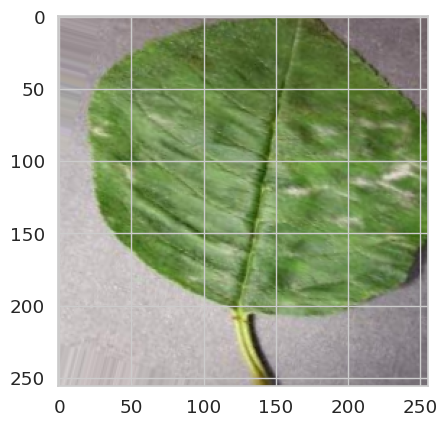

(32, 256, 256, 3)


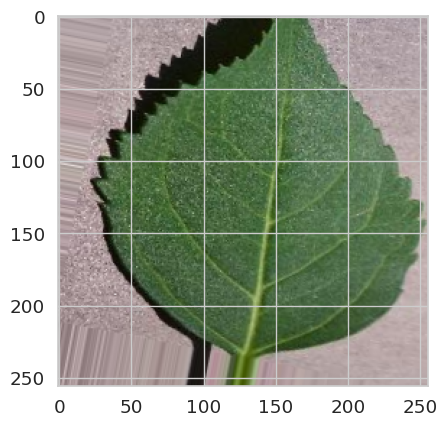

(32, 256, 256, 3)


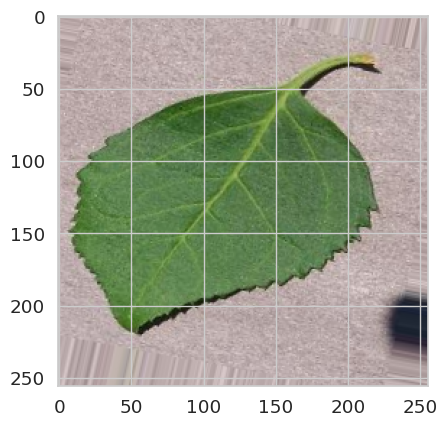

In [116]:
for _ in range(3):
    img, label = train_set.next()
    print(img.shape)
    plt.imshow(img[0])
    plt.show()

(32, 256, 256, 3)


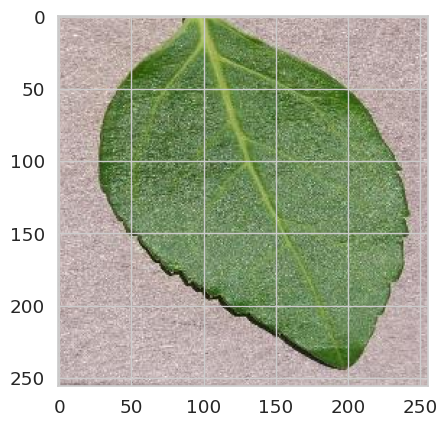

(32, 256, 256, 3)


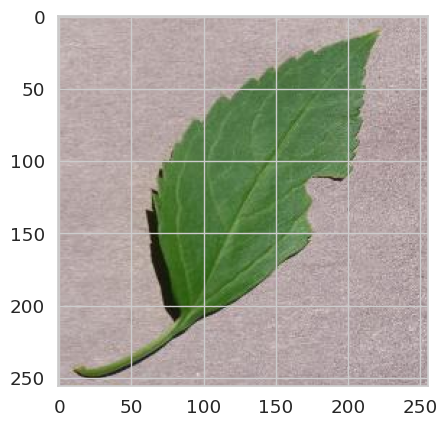

(32, 256, 256, 3)


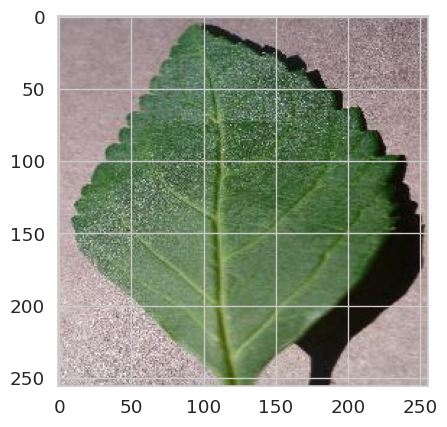

In [117]:
for _ in range(3):
    img, label = validation_set.next()
    print(img.shape)  # (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

(32, 256, 256, 3)


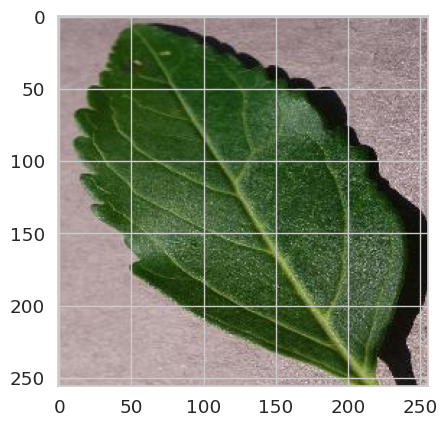

(32, 256, 256, 3)


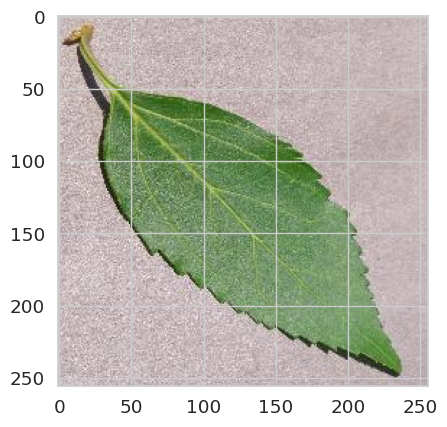

(32, 256, 256, 3)


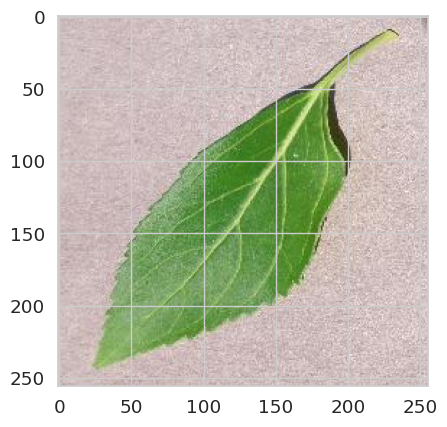

In [118]:
for _ in range(3):
    img, label = test_set.next()
    print(img.shape)  # (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

In [119]:
joblib.dump(value=train_set.class_indices,
            filename=f"{file_path}/class_indices.pkl")

['outputs/v1/class_indices.pkl']

In [23]:
# Save class_indices
joblib.dump(value=train_set.class_indices,
            filename=f"{file_path}/class_indices.pkl")

['outputs/v1/class_indices.pkl']

---

## Model Creation

The modelused is the Convolutional Neural Network (CNN) which will learn from the dorminant feature (the powdery mildew) of the pre-labeled cherry leaf image.

#### Machine Learning Model

Import packages

In [120]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [121]:
def create_tf_model():
    model = Sequential()

    model.add(Conv2D(filters=32, kernel_size=(3, 3),
              input_shape=image_shape, activation='relu', ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3, 3),
              input_shape=image_shape, activation='relu', ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3, 3),
              input_shape=image_shape, activation='relu', ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))

    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model

In [122]:
create_tf_model().summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 57600)            

In [123]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3)

In [124]:
model = create_tf_model()
model.fit(train_set,
          epochs=25,
          steps_per_epoch=len(train_set.classes) // batch_size,
          validation_data=validation_set,
          callbacks=[early_stop],
          verbose=1
          )

Epoch 1/25
92/92 [==============================] - 159s 2s/step - loss: 0.2999 - accuracy: 0.8601 - val_loss: 0.2019 - val_accuracy: 0.9286
Epoch 2/25
92/92 [==============================] - 159s 2s/step - loss: 0.0680 - accuracy: 0.9806 - val_loss: 0.0732 - val_accuracy: 0.9833
Epoch 3/25
92/92 [==============================] - 159s 2s/step - loss: 0.0505 - accuracy: 0.9847 - val_loss: 0.2891 - val_accuracy: 0.9262
Epoch 4/25
92/92 [==============================] - 157s 2s/step - loss: 0.0449 - accuracy: 0.9878 - val_loss: 0.0127 - val_accuracy: 0.9952
Epoch 5/25
92/92 [==============================] - 158s 2s/step - loss: 0.0171 - accuracy: 0.9959 - val_loss: 0.0025 - val_accuracy: 0.9976
Epoch 6/25
92/92 [==============================] - 157s 2s/step - loss: 0.0240 - accuracy: 0.9908 - val_loss: 0.0925 - val_accuracy: 0.9571
Epoch 7/25
92/92 [==============================] - 159s 2s/step - loss: 0.0332 - accuracy: 0.9874 - val_loss: 0.0031 - val_accuracy: 0.9976
Epoch 8/25
92

In [125]:
model.save(f'{file_path}/mildew_detector_model.h5')

model preform

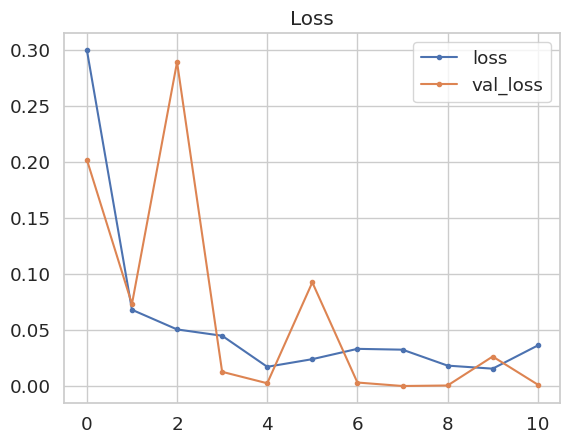

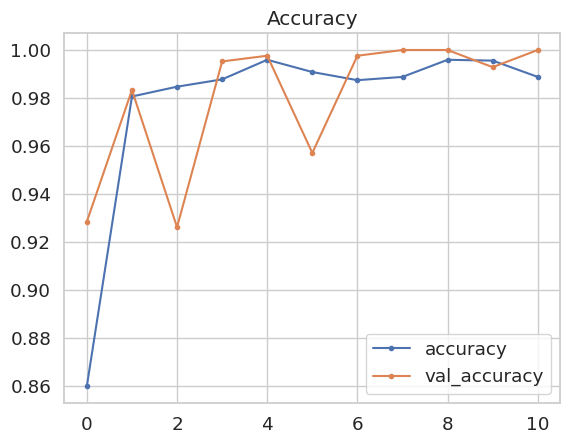

In [126]:
losses = pd.DataFrame(model.history.history)

sns.set_style("whitegrid")
losses[['loss','val_loss']].plot(style='.-')
plt.title("Loss")
plt.savefig(f'{file_path}/model_training_losses.png', bbox_inches='tight', dpi=150)
plt.show()

print("\n")
losses[['accuracy','val_accuracy']].plot(style='.-')
plt.title("Accuracy")
plt.savefig(f'{file_path}/model_training_acc.png', bbox_inches='tight', dpi=150)
plt.show()

Evaulation

In [127]:
from keras.models import load_model
model = load_model(f'{file_path}/mildew_detector_model.h5')

In [128]:
evaluation = model.evaluate(test_set)

27/27 [==============================] - 13s 455ms/step - loss: 7.9388e-04 - accuracy: 1.0000


In [129]:
joblib.dump(value=evaluation, filename=f'{file_path}/evaluation.pk1')

['outputs/v1/evaluation.pk1']